# Monitoring the geography and condition of our planet, is incredibly important to understanding the ways we are leaving some sort of impact on our planet. One of the largest formations of land on our planet is the artic ice regions in the north. The goal of this project is to understand the condition of the Artic over the years, analyze various environmental factors and effects, and build a model which will hopefully allow us to understand what the future of the Artic region may look like.

**To begin, we might take a glance at the past, to understand how the Artic sea ice concentration has fluctuated over the last few decades, particularly analyzing the SIarea variable from the NASA ECCO dataset**

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

In [15]:


# read in the data
ds = xr.open_dataset("SIarea_2015_01.nc")
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
SIarea = np.array(ds['SIarea'][:])

# subset sea ice to the first time step
SIarea = SIarea[0,:,:]

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


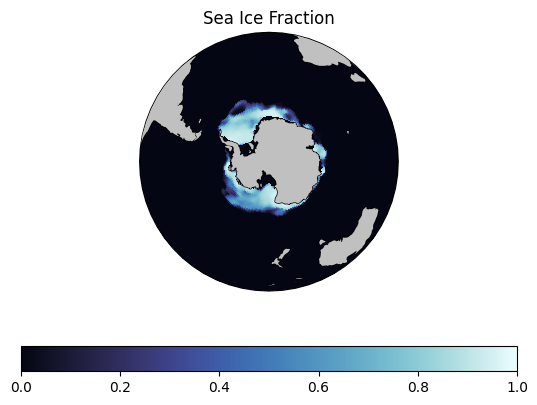

In [20]:
# create a figure object
fig = plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(central_latitude = -90))

# plot the seaice
plt.pcolormesh(longitude, latitude, SIarea, vmin=0, vmax=1, cmap=cm.ice,
               transform=ccrs.PlateCarree())
plt.colorbar(orientation = 'horizontal')

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# format the axes
plt.title('Sea Ice Fraction')
plt.show()

In [54]:
#male plot_frames function to read data and make a plot
def plot_frame( SIarea, file_path):

    # make a figure object with projection
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection=ccrs.Orthographic(central_latitude = 80))

    # plot the sea ice field
    plt.pcolormesh(longitude, latitude, SIarea, vmin=0, vmax=1, cmap=cm.ice,
                   transform=ccrs.PlateCarree())
    plt.colorbar(orientation = 'horizontal', label='Sea Ice Concentration')

    # add coastlines
    plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
    plt.gca().coastlines()

    # format the axes
    plt.title('Sea Ice Fraction')

    # save the figure
    plt.savefig(file_path)
    plt.close(fig)




In [37]:
# define a path to a directory for your frames directory
frames_directory = 'frames'

# define an output path for your frame

i = 0


file_list = []
# test your plotting function here
for i in range(1992,2018):

        # make a path to a sea ice file
    seaice_file = os.path.join('longData','SIarea_' + str(i) + '_01'.format(i) + '.nc')

    # read in the sea ice data at along with the
    # latitude and longitude information

    ds = xr.open_dataset(seaice_file)
    longitude = np.array(ds['longitude'][:])
    latitude = np.array(ds['latitude'][:])
    SIarea = np.array(ds['SIarea'][:])
    ds.close()

    SIarea = SIarea[0,:,:]




    file_path = os.path.join(frames_directory,'SIarea_' + str(i) +'_01.png')
    file_list.append(file_path)
    plot_frame(SIarea, file_path)



**This short video shows how the ice formations fluctuate every year. One can see how the shape and size of the artic is never the same each year. And although the ice concentration is not constantly linearly decreasing, we can plot the concrentrations for several years, and analyze how the concentration.**

In [38]:
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=5)
clip.write_videofile('Artic Sea Ice yearly.mp4')

Moviepy - Building video Artic Sea Ice yearly.mp4.
Moviepy - Writing video Artic Sea Ice yearly.mp4



Moviepy - Done !
Moviepy - video ready Artic Sea Ice yearly.mp4


<ipython-input-51-6a837fa26aa4>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(years, sea_ice_areas, 'o-',linestyle='none', label='Sea Ice Area')


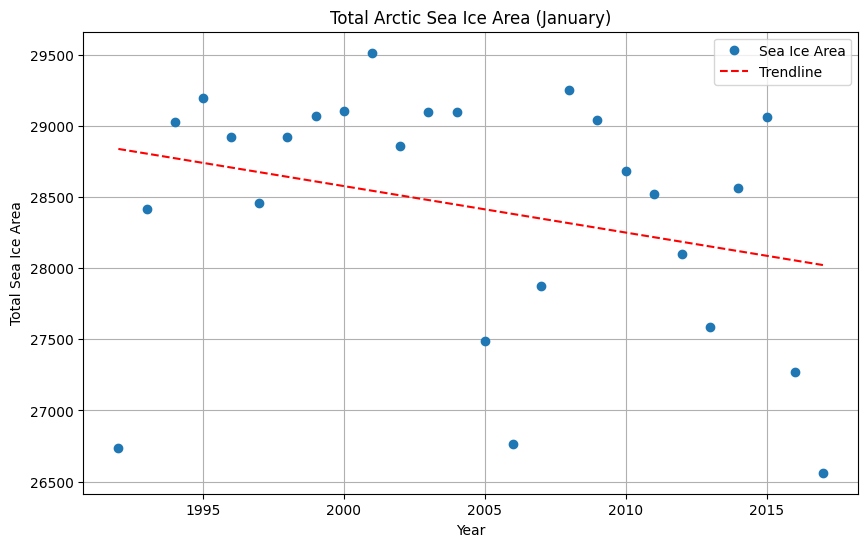

In [51]:
# prompt: create a simple plot of the sea ice values over the years, with a trendline

# Calculate the total sea ice area for each year
sea_ice_areas = []
years = range(1992, 2018)

for year in years:
    seaice_file = os.path.join('longData', f'SIarea_{year}_01.nc')
    ds = xr.open_dataset(seaice_file)
    # Sum the sea ice area values. Assuming the units are consistent and represent area.
    total_area = ds['SIarea'][0, :, :].sum().values
    sea_ice_areas.append(total_area)
    ds.close()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(years, sea_ice_areas, 'o-',linestyle='none', label='Sea Ice Area')

# Add a trendline using numpy.polyfit
z = np.polyfit(years, sea_ice_areas, 1)
p = np.poly1d(z)
plt.plot(years, p(years), "r--", label='Trendline')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sea Ice Area')
plt.title('Total Arctic Sea Ice Area (January) from 1992-2017')
plt.legend()
plt.grid(True)
plt.show()


**Based on this plot, one can see how although it is not consistent, the concentration of sea ice in the Artic over time, is decreasing. The question now is, how long until this decrease in sea ice has lasting impacts, and what exactly is causing it?**

**Of course, the most likely cause is the one rapidly changing variable in our global environment, rapidly increasing global temperatures. We can analyze how this is changing by plotting the THETA variable, which represents the potential temperature of seawater.**

In [96]:
# find the lon index closest to -50 E
lon_index = np.argmin(np.abs(longitude - (37)))

# find the lat index closest to 57.4 N
lat_index = np.argmin(np.abs(latitude - (74)))

# sanity check
print('The longitude at index',lon_index,'is',longitude[lon_index])


The longitude at index 433 is 36.75


In [97]:
# make a list to store the temperature values
temp_values = np.zeros((50,26))
i = 0
# loop through each file, accessing them by index
for year in range(1992, 2018):

    # identify the file name
    theta_file = os.path.join('THETA', f'THETA_{year}_01.nc')



    # read in the data at the surface in the Labrador Sea
    ds = xr.open_dataset(theta_file)
    Theta = np.array(ds['THETA'][:])
    ds.close()

    # add the profile to the array
    theta = Theta[0,:,lat_index,lon_index]
    temp_values[:,i] = theta
    i +=1


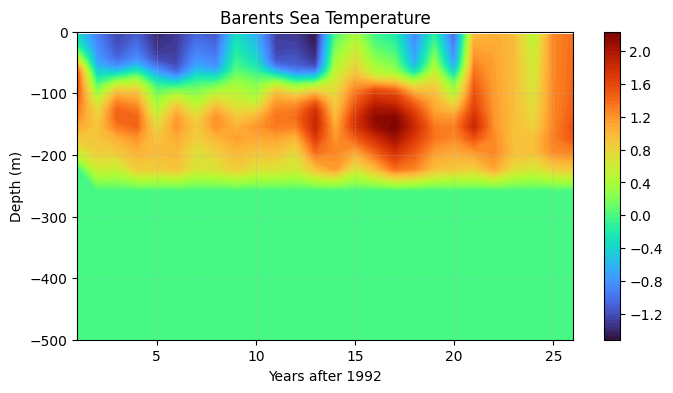

In [98]:
# make a figure
fig = plt.figure(figsize=(8,4))

# plot the temperature array with pcolormesh or contourf
# use 100 levels and a color range of 3.5 to 9
plt.contourf(np.arange(1,27),Z,temp_values,100, cmap='turbo')

# add a colorbar
plt.colorbar()

# format the axes
plt.ylabel('Depth (m)')
plt.xlabel('Years after 1992')
plt.title('Barents Sea Temperature')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)
plt.gca().set_ylim([-500,0])

# show the plot
plt.show()

**Here I've plotted the fluctuations of the the sea water potential temperatures in the Barents Sea, a body of water near the Artic region near the coasts of Russia. From this plot, one can see how since 1992, sea temperature are are rising throughout the entire depth of the sea. And this type of trend will only continue as global temperatures rise.**